# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [36]:
learning_rate = 0.01
training_steps = 1000

In [37]:
X = np.random.randn(50)
Y = 2 * X + np.random.randn(50)

In [38]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [39]:
def run_optimizer():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [40]:
for step in range(1, training_steps+1):
    run_optimizer()

    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("Step: {:4d}\tLoss: {:.4f}\tW: {:.4f}\tB: {:.4f}".format(step, loss, W.numpy(), b.numpy()))

Step:   50	Loss: 2.6878	W: 0.9451	B: -0.3518
Step:  100	Loss: 1.4191	W: 1.6667	B: -0.0550
Step:  150	Loss: 1.1520	W: 1.9998	B: 0.0762
Step:  200	Loss: 1.0958	W: 2.1534	B: 0.1345
Step:  250	Loss: 1.0839	W: 2.2242	B: 0.1607
Step:  300	Loss: 1.0814	W: 2.2567	B: 0.1725
Step:  350	Loss: 1.0809	W: 2.2717	B: 0.1778
Step:  400	Loss: 1.0808	W: 2.2786	B: 0.1802
Step:  450	Loss: 1.0807	W: 2.2818	B: 0.1813
Step:  500	Loss: 1.0807	W: 2.2832	B: 0.1818
Step:  550	Loss: 1.0807	W: 2.2839	B: 0.1820
Step:  600	Loss: 1.0807	W: 2.2842	B: 0.1821
Step:  650	Loss: 1.0807	W: 2.2843	B: 0.1822
Step:  700	Loss: 1.0807	W: 2.2844	B: 0.1822
Step:  750	Loss: 1.0807	W: 2.2844	B: 0.1822
Step:  800	Loss: 1.0807	W: 2.2845	B: 0.1822
Step:  850	Loss: 1.0807	W: 2.2845	B: 0.1822
Step:  900	Loss: 1.0807	W: 2.2845	B: 0.1822
Step:  950	Loss: 1.0807	W: 2.2845	B: 0.1822
Step: 1000	Loss: 1.0807	W: 2.2845	B: 0.1822


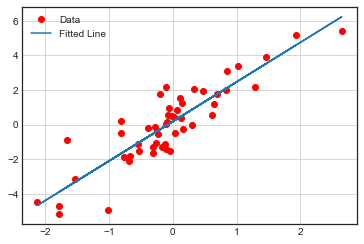

In [41]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W*X+b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [65]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [66]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [67]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [68]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-1.6876321
-1.4056385
-0.2810027


### 데이터 지정

In [69]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

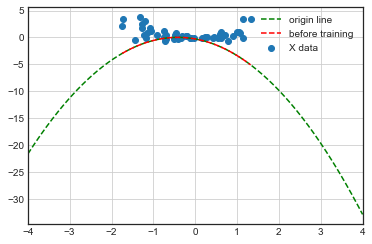

In [70]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before training')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [71]:
def compute_loss():
    pred_y = a*(np.array(X)**2) + b*np.array(X) + c
    loss = tf.reduce_mean((pred_y - Y)**2)
    return loss

### Optimizer

In [72]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [73]:
for epoch in range(1, epochs+1):
    optimizer.minimize(compute_loss, var_list=[a, b, c])

    if epoch % 100 == 0:
        print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 0.4018	b: -0.1145	c: 0.4801
epoch:  200	a: 0.9844	b: 0.0788	c: -0.0303
epoch:  300	a: 1.0999	b: 0.1169	c: -0.1327
epoch:  400	a: 1.1099	b: 0.1202	c: -0.1415
epoch:  500	a: 1.1102	b: 0.1203	c: -0.1418
epoch:  600	a: 1.1102	b: 0.1203	c: -0.1418
epoch:  700	a: 1.1102	b: 0.1203	c: -0.1418
epoch:  800	a: 1.1102	b: 0.1203	c: -0.1418
epoch:  900	a: 1.1102	b: 0.1202	c: -0.1418
epoch: 1000	a: 1.1102	b: 0.1202	c: -0.1418


### 학습 후의 회귀선

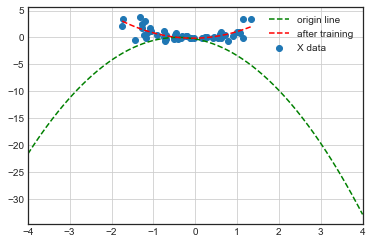

In [74]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='after training')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [107]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [108]:
num_classes = 10
num_features = 28*28

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [109]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸 

In [144]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [145]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

### Util Functions

In [154]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), 1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [155]:
optimizer = tf.optimizers.SGD(learning_rate)

In [156]:
def run_optimizer(x, y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [157]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimizer(batch_x, batch_y)

    if step % 50 == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: {:4d}\tloss: {:.4f}\taccuracy: {:.4}".format(step, loss, acc))

step:   50	loss: 7.2459	accuracy: 0.1562
step:  100	loss: 4.3173	accuracy: 0.3398
step:  150	loss: 3.3594	accuracy: 0.4766
step:  200	loss: 2.6519	accuracy: 0.5742
step:  250	loss: 1.8547	accuracy: 0.6289
step:  300	loss: 1.9112	accuracy: 0.6406
step:  350	loss: 2.0116	accuracy: 0.6406
step:  400	loss: 1.4252	accuracy: 0.7188
step:  450	loss: 1.3284	accuracy: 0.7383
step:  500	loss: 1.5072	accuracy: 0.7461
step:  550	loss: 1.1856	accuracy: 0.7734
step:  600	loss: 1.1435	accuracy: 0.7461
step:  650	loss: 1.4957	accuracy: 0.7617
step:  700	loss: 0.7821	accuracy: 0.8203
step:  750	loss: 0.9562	accuracy: 0.7773
step:  800	loss: 1.2829	accuracy: 0.7539
step:  850	loss: 0.8356	accuracy: 0.8203
step:  900	loss: 1.2273	accuracy: 0.7773
step:  950	loss: 0.8615	accuracy: 0.8203
step: 1000	loss: 1.0112	accuracy: 0.7812


###  테스트

In [158]:
pred = logistic_regression(x_test)
print("Test accuracy: {}".format(accuracy(pred, y_test)))

Test accuracy: 0.8123000264167786


### 시각화

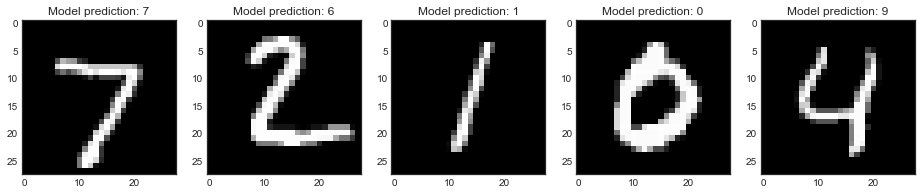

In [162]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(16, 8))
for i in range(1, num_images+1):
    plt.subplot(1, num_images, i)
    plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
    plt.title("Model prediction: {}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()